# We have two data sets: data_orders and data_offers, both being stored in a CSV format. The data_orders data set contains the following columns:

- order_datetime - time of the order
- origin_longitude - longitude of the order
- origin_latitude - latitude of the order
- m_order_eta - time before order arrival
- order_gk - order number
- order_status_key - status, an enumeration consisting of the following mapping:
      4 - cancelled by client,
     9 - cancelled by system, i.e., a reject
- is_driver_assigned_key - whether a driver has been assigned
- cancellation_time_in_seconds - how many seconds passed before cancellation
- The data_offers data set is a simple map with 2 columns:

- order_gk - order number, associated with the same column from the orders data set
- offer_id - ID of an offer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df_offer=pd.read_csv("data_offers.csv")

In [3]:
df_offer

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196
...,...,...
334358,3000552921666,300050611632
334359,3000593796526,300051443024
334360,3000590955748,300051340498
334361,3000557510943,300050772593


In [4]:
df_order=pd.read_csv("data_orders.csv")

In [5]:
df_order

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN
...,...,...,...,...,...,...,...,...
10711,13:11:35,-0.975372,51.457846,NaN,3000599186906,4,0,36.0
10712,13:13:55,-0.975372,51.457846,NaN,3000599186962,4,0,4.0
10713,13:17:21,-0.972926,51.457693,60.0,3000599187034,4,1,34.0
10714,13:16:28,-0.975372,51.457846,NaN,3000599187024,4,0,6.0


In [6]:
df_order.isnull().sum()

order_datetime                      0
origin_longitude                    0
origin_latitude                     0
m_order_eta                      7902
order_gk                            0
order_status_key                    0
is_driver_assigned_key              0
cancellations_time_in_seconds    3409
dtype: int64

In [7]:
len(df_offer.offer_id.unique())

334363

In [8]:
df_order.cancellations_time_in_seconds.fillna(value=0,inplace=True)

In [9]:
df_order

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,0.0
...,...,...,...,...,...,...,...,...
10711,13:11:35,-0.975372,51.457846,NaN,3000599186906,4,0,36.0
10712,13:13:55,-0.975372,51.457846,NaN,3000599186962,4,0,4.0
10713,13:17:21,-0.972926,51.457693,60.0,3000599187034,4,1,34.0
10714,13:16:28,-0.975372,51.457846,NaN,3000599187024,4,0,6.0


mean time for time before order arrival 7.356923714759535 hours


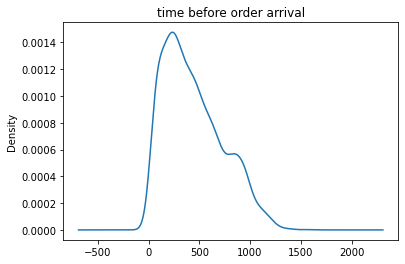

In [10]:
df_order.m_order_eta.plot(kind='kde',title='time before order arrival')
print('mean time for time before order arrival',df_order.m_order_eta.mean()/60,"hours")

In [11]:
df_order.m_order_eta.fillna(value=df_order.m_order_eta.mean(),inplace=True)

(0.001, 0.008)

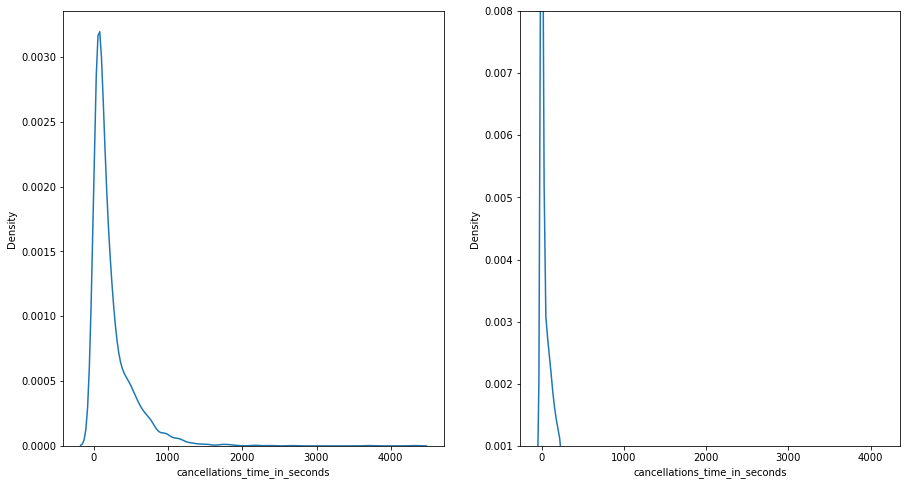

In [12]:
plt.figure(figsize=(15,8))
plt.subplot(121)
sns.kdeplot(df_order[df_order.is_driver_assigned_key==1].cancellations_time_in_seconds)
plt.subplot(122)
sns.kdeplot(df_order[df_order.is_driver_assigned_key==0].cancellations_time_in_seconds)
plt.ylim(0.001,0.008)

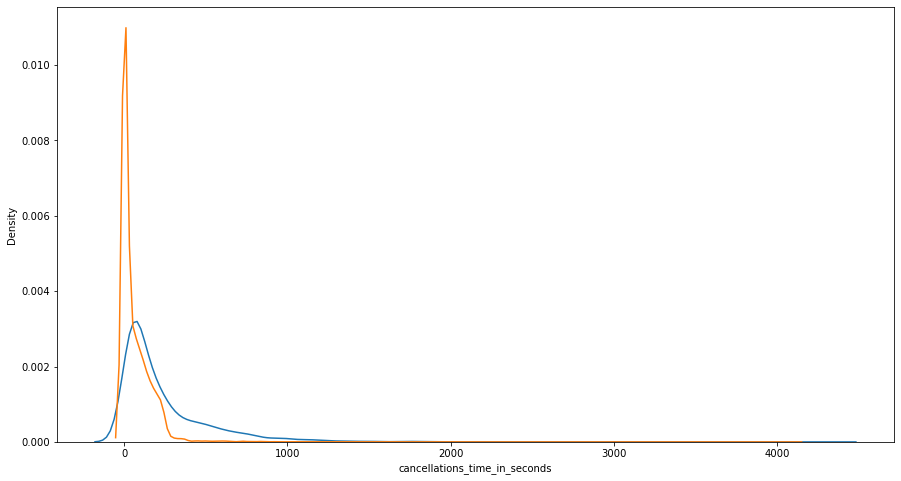

In [13]:
plt.figure(figsize=(15,8))
sns.kdeplot(df_order[df_order.is_driver_assigned_key==1].cancellations_time_in_seconds)
sns.kdeplot(df_order[df_order.is_driver_assigned_key==0].cancellations_time_in_seconds)
plt.show()

In [14]:
df_order.order_datetime=pd.to_datetime(df_order.order_datetime)

In [15]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_datetime                 10716 non-null  datetime64[ns]
 1   origin_longitude               10716 non-null  float64       
 2   origin_latitude                10716 non-null  float64       
 3   m_order_eta                    10716 non-null  float64       
 4   order_gk                       10716 non-null  int64         
 5   order_status_key               10716 non-null  int64         
 6   is_driver_assigned_key         10716 non-null  int64         
 7   cancellations_time_in_seconds  10716 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 669.9 KB


In [16]:
final_df=pd.concat([df_order,df_offer],keys=df_order['order_gk'])

In [17]:
final_df

order_datetime  origin_longitude  origin_latitude  \
order_gk                                                                      
3000583041974 0      2023-01-01 18:08:07         -0.978916        51.456173   
              1      2023-01-01 20:57:32         -0.950385        51.456843   
              2      2023-01-01 12:07:50         -0.969520        51.455544   
              3      2023-01-01 13:50:20         -1.054671        51.460544   
              4      2023-01-01 21:24:45         -0.967605        51.458236   
...                                  ...               ...              ...   
3000583116437 334358                 NaT               NaN              NaN   
              334359                 NaT               NaN              NaN   
              334360                 NaT               NaN              NaN   
              334361                 NaT               NaN              NaN   
              334362                 NaT               NaN              NaN   

                      m_order_eta       order_gk  order_status_key  \
order_gk                                                             
3000583041974 0         60.000000  3000583041974               4.0   
              1        441.415423  3000583116437               4.0   
              2        477.000000  3000582891479               4.0   
              3        658.000000  3000582941169               4.0   
              4        441.415423  3000583140877               9.0   
...                           ...            ...               ...   
3000583116437 334358          NaN  3000552921666               NaN   
              334359          NaN  3000593796526               NaN   
              334360          NaN  3000590955748               NaN   
              334361          NaN  3000557510943               NaN   
              334362          NaN  3000630405861               NaN   

                      is_driver_assigned_key  cancellations_time_in_seconds  \
order_gk                                                                      
3000583041974 0                          1.0                          198.0   
              1                          0.0                          128.0   
              2                          1.0                           46.0   
              3                          1.0                           62.0   
              4                          0.0                            0.0   
...                                      ...                            ...   
3000583116437 334358                     NaN                            NaN   
              334359                     NaN                            NaN   
              334360                     NaN                            NaN   
              334361                     NaN                            NaN   
              334362                     NaN                            NaN   

                          offer_id  
order_gk                            
3000583041974 0                NaN  
              1                NaN  
              2                NaN  
              3                NaN  
              4                NaN  
...                            ...  
3000583116437 334358  3.000506e+11  
              334359  3.000514e+11  
              334360  3.000513e+11  
              334361  3.000508e+11  
              334362  3.000523e+11  

[345079 rows x 9 columns]

In [18]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_datetime                 10716 non-null  datetime64[ns]
 1   origin_longitude               10716 non-null  float64       
 2   origin_latitude                10716 non-null  float64       
 3   m_order_eta                    10716 non-null  float64       
 4   order_gk                       10716 non-null  int64         
 5   order_status_key               10716 non-null  int64         
 6   is_driver_assigned_key         10716 non-null  int64         
 7   cancellations_time_in_seconds  10716 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 669.9 KB


In [19]:
df_order

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,2023-01-01 18:08:07,-0.978916,51.456173,60.000000,3000583041974,4,1,198.0
1,2023-01-01 20:57:32,-0.950385,51.456843,441.415423,3000583116437,4,0,128.0
2,2023-01-01 12:07:50,-0.969520,51.455544,477.000000,3000582891479,4,1,46.0
3,2023-01-01 13:50:20,-1.054671,51.460544,658.000000,3000582941169,4,1,62.0
4,2023-01-01 21:24:45,-0.967605,51.458236,441.415423,3000583140877,9,0,0.0
...,...,...,...,...,...,...,...,...
10711,2023-01-01 13:11:35,-0.975372,51.457846,441.415423,3000599186906,4,0,36.0
10712,2023-01-01 13:13:55,-0.975372,51.457846,441.415423,3000599186962,4,0,4.0
10713,2023-01-01 13:17:21,-0.972926,51.457693,60.000000,3000599187034,4,1,34.0
10714,2023-01-01 13:16:28,-0.975372,51.457846,441.415423,3000599187024,4,0,6.0


In [20]:
df_order["order_hour"]=df_order.order_datetime.dt.hour

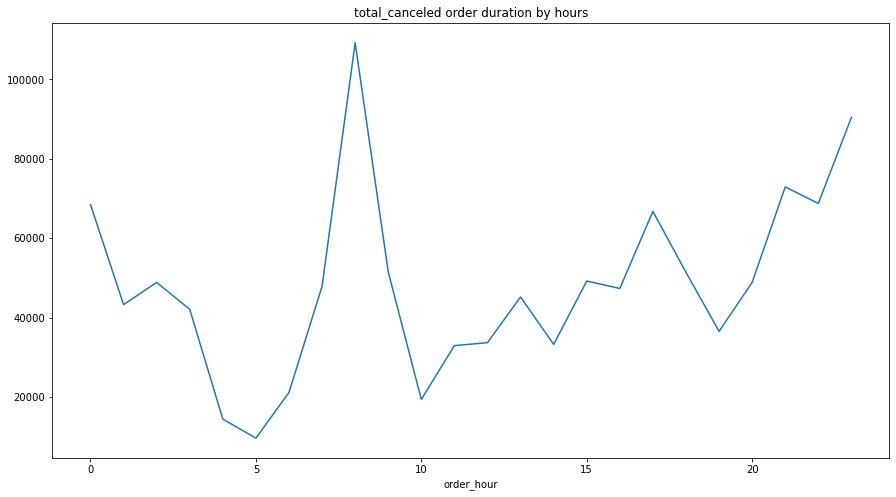

In [21]:
plt.figure(figsize=(15,8))
df_order.groupby('order_hour').cancellations_time_in_seconds.sum().plot(title='total_canceled order duration by hours')
plt.show()

C:\Users\skidrow_pc\Anaconda3\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cancellations_time_in_seconds', ylabel='count'>

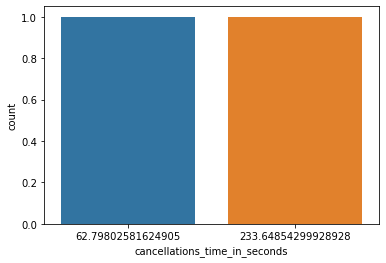

In [22]:
sns.countplot(df_order.groupby('is_driver_assigned_key').cancellations_time_in_seconds.mean())

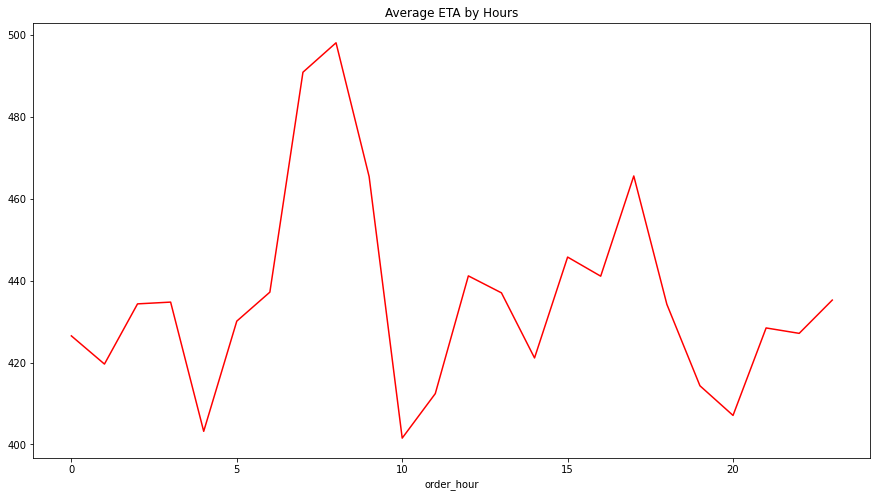

In [23]:
plt.figure(figsize=(15,8))
df_order.groupby('order_hour').m_order_eta.mean().plot(title='Average ETA by Hours',color='red')
plt.show()

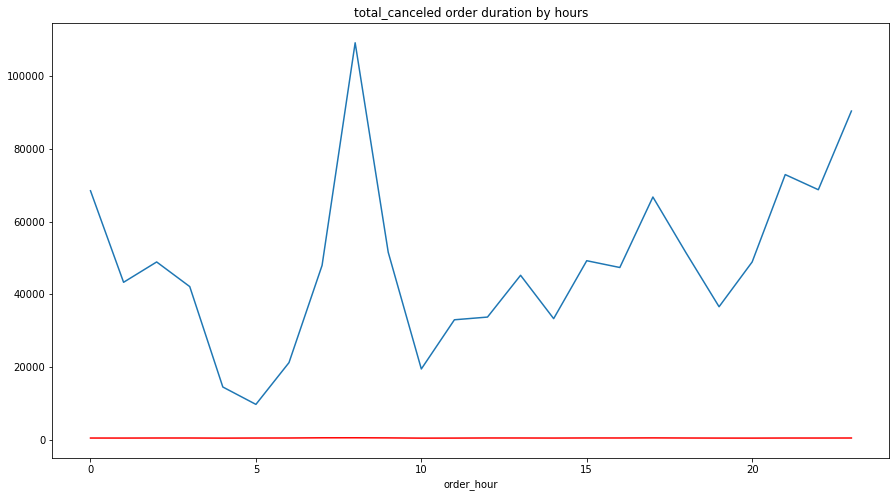

In [24]:
plt.figure(figsize=(15,8))
df_order.groupby('order_hour').m_order_eta.mean().plot(title='Average ETA by Hours',color='red')
df_order.groupby('order_hour').cancellations_time_in_seconds.sum().plot(title='total_canceled order duration by hours')
plt.show()

In [25]:
df_offer

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196
...,...,...
334358,3000552921666,300050611632
334359,3000593796526,300051443024
334360,3000590955748,300051340498
334361,3000557510943,300050772593


In [26]:
df_order

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,order_hour
0,2023-01-01 18:08:07,-0.978916,51.456173,60.000000,3000583041974,4,1,198.0,18
1,2023-01-01 20:57:32,-0.950385,51.456843,441.415423,3000583116437,4,0,128.0,20
2,2023-01-01 12:07:50,-0.969520,51.455544,477.000000,3000582891479,4,1,46.0,12
3,2023-01-01 13:50:20,-1.054671,51.460544,658.000000,3000582941169,4,1,62.0,13
4,2023-01-01 21:24:45,-0.967605,51.458236,441.415423,3000583140877,9,0,0.0,21
...,...,...,...,...,...,...,...,...,...
10711,2023-01-01 13:11:35,-0.975372,51.457846,441.415423,3000599186906,4,0,36.0,13
10712,2023-01-01 13:13:55,-0.975372,51.457846,441.415423,3000599186962,4,0,4.0,13
10713,2023-01-01 13:17:21,-0.972926,51.457693,60.000000,3000599187034,4,1,34.0,13
10714,2023-01-01 13:16:28,-0.975372,51.457846,441.415423,3000599187024,4,0,6.0,13


In [27]:
final_df = df_order.merge(right=df_offer, how="inner", on="order_gk")

In [28]:
final_df

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,order_hour,offer_id
0,2023-01-01 18:08:07,-0.978916,51.456173,60.000000,3000583041974,4,1,198.0,18,300050983403
1,2023-01-01 20:57:32,-0.950385,51.456843,441.415423,3000583116437,4,0,128.0,20,300050986179
2,2023-01-01 20:57:32,-0.950385,51.456843,441.415423,3000583116437,4,0,128.0,20,300050986174
3,2023-01-01 20:57:32,-0.950385,51.456843,441.415423,3000583116437,4,0,128.0,20,300050986180
4,2023-01-01 12:07:50,-0.969520,51.455544,477.000000,3000582891479,4,1,46.0,12,300050976275
...,...,...,...,...,...,...,...,...,...,...
31263,2023-01-01 12:44:11,-0.975372,51.457846,441.415423,3000597886155,4,0,43.0,12,300051590196
31264,2023-01-01 12:42:52,-0.975372,51.457846,441.415423,3000597886140,4,0,44.0,12,300051590176
31265,2023-01-01 13:11:35,-0.975372,51.457846,441.415423,3000599186906,4,0,36.0,13,300051648809
31266,2023-01-01 13:17:21,-0.972926,51.457693,60.000000,3000599187034,4,1,34.0,13,300051648910


In [29]:
final_df["order_status_key_meaning"]=final_df['order_status_key'].apply(lambda x : "cancelled by client" if x==4 else "cancelled by system")

In [30]:
final_df.sample(10)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,order_hour,offer_id,order_status_key_meaning
9060,2023-01-01 14:02:04,-0.974287,51.454360,441.415423,3000624892121,4,0,76.0,14,300051950878,cancelled by client
15997,2023-01-01 16:31:16,-0.969202,51.433169,355.000000,3000557335931,4,1,371.0,16,300050764636,cancelled by client
8813,2023-01-01 23:44:27,-0.947958,51.444953,441.415423,3000590131622,9,0,0.0,23,300051312536,cancelled by system
3824,2023-01-01 03:39:18,-0.964599,51.446226,238.000000,3000630930686,4,1,37.0,3,300052323065,cancelled by client
1556,2023-01-01 13:24:09,-0.969525,51.451737,441.415423,3000599860817,4,0,203.0,13,300051680064,cancelled by client
13544,2023-01-01 18:46:55,-0.956437,51.451732,60.000000,3000622416453,4,1,50.0,18,300051772296,cancelled by client
24566,2023-01-01 03:50:58,-0.953995,51.442406,358.000000,3000598960562,4,1,300.0,3,300051638426,cancelled by client
5338,2023-01-01 07:58:59,-0.975724,51.456744,441.415423,3000624091990,4,0,82.0,7,300051882435,cancelled by client
23191,2023-01-01 02:31:33,-0.972046,51.457949,441.415423,3000617025440,9,0,0.0,2,300051699764,cancelled by system
27690,2023-01-01 06:49:57,-0.925492,51.430351,1192.000000,3000577125696,4,1,89.0,6,300050806109,cancelled by client


In [31]:
final_df.drop(columns=["order_status_key"], inplace=True)

In [32]:
final_df

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,is_driver_assigned_key,cancellations_time_in_seconds,order_hour,offer_id,order_status_key_meaning
0,2023-01-01 18:08:07,-0.978916,51.456173,60.000000,3000583041974,1,198.0,18,300050983403,cancelled by client
1,2023-01-01 20:57:32,-0.950385,51.456843,441.415423,3000583116437,0,128.0,20,300050986179,cancelled by client
2,2023-01-01 20:57:32,-0.950385,51.456843,441.415423,3000583116437,0,128.0,20,300050986174,cancelled by client
3,2023-01-01 20:57:32,-0.950385,51.456843,441.415423,3000583116437,0,128.0,20,300050986180,cancelled by client
4,2023-01-01 12:07:50,-0.969520,51.455544,477.000000,3000582891479,1,46.0,12,300050976275,cancelled by client
...,...,...,...,...,...,...,...,...,...,...
31263,2023-01-01 12:44:11,-0.975372,51.457846,441.415423,3000597886155,0,43.0,12,300051590196,cancelled by client
31264,2023-01-01 12:42:52,-0.975372,51.457846,441.415423,3000597886140,0,44.0,12,300051590176,cancelled by client
31265,2023-01-01 13:11:35,-0.975372,51.457846,441.415423,3000599186906,0,36.0,13,300051648809,cancelled by client
31266,2023-01-01 13:17:21,-0.972926,51.457693,60.000000,3000599187034,1,34.0,13,300051648910,cancelled by client


In [33]:
import h3
import folium

In [34]:
final_df["hex_id"] = final_df.apply(
    func=lambda row: h3.geo_to_h3(lat=row["origin_latitude"], lng=row["origin_longitude"], resolution=8), axis=1)

In [35]:
final_df

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,is_driver_assigned_key,cancellations_time_in_seconds,order_hour,offer_id,order_status_key_meaning,hex_id
0,2023-01-01 18:08:07,-0.978916,51.456173,60.000000,3000583041974,1,198.0,18,300050983403,cancelled by client,88195d2b03fffff
1,2023-01-01 20:57:32,-0.950385,51.456843,441.415423,3000583116437,0,128.0,20,300050986179,cancelled by client,88195d2b19fffff
2,2023-01-01 20:57:32,-0.950385,51.456843,441.415423,3000583116437,0,128.0,20,300050986174,cancelled by client,88195d2b19fffff
3,2023-01-01 20:57:32,-0.950385,51.456843,441.415423,3000583116437,0,128.0,20,300050986180,cancelled by client,88195d2b19fffff
4,2023-01-01 12:07:50,-0.969520,51.455544,477.000000,3000582891479,1,46.0,12,300050976275,cancelled by client,88195d2b1dfffff
...,...,...,...,...,...,...,...,...,...,...,...
31263,2023-01-01 12:44:11,-0.975372,51.457846,441.415423,3000597886155,0,43.0,12,300051590196,cancelled by client,88195d2b03fffff
31264,2023-01-01 12:42:52,-0.975372,51.457846,441.415423,3000597886140,0,44.0,12,300051590176,cancelled by client,88195d2b03fffff
31265,2023-01-01 13:11:35,-0.975372,51.457846,441.415423,3000599186906,0,36.0,13,300051648809,cancelled by client,88195d2b03fffff
31266,2023-01-01 13:17:21,-0.972926,51.457693,60.000000,3000599187034,1,34.0,13,300051648910,cancelled by client,88195d2b1dfffff


In [36]:
grouped_q5 = final_df.groupby(by="hex_id")["order_gk"].count()
grouped_q5 

hex_id
88195d2801fffff    65
88195d2803fffff    14
88195d2805fffff    10
88195d2807fffff     3
88195d2809fffff    46
                   ..
88195d749dfffff     2
88195d74d1fffff     1
88195d74d3fffff     4
88195d74d5fffff     1
88195d74d7fffff     5
Name: order_gk, Length: 139, dtype: int64

### Here we will find out the number of Hex which contains the 80% of the order so to figure out the Problem we will do the Following steps:
- 1 Sort the DataFrame by the count.
- 2 Find the total number (sum) of failed orders.
- 3 Apply the method cumsum to find the cumulative sum of the order-count column.
- 4 Divide by the total sum to generate percentages.
- 5 Filter to find the row that is closest to 80%.

In [37]:
grouped_q5 = grouped_q5.reset_index()
grouped_q5 = grouped_q5.sort_values(by="order_gk") 
grouped_q5

,hex_id,order_gk
137,88195d74d5fffff,1
135,88195d74d1fffff,1
79,88195d2aebfffff,1
11,88195d282bfffff,1
122,88195d3993fffff,1
...,...,...
91,88195d2b19fffff,1960
87,88195d2b11fffff,2191
89,88195d2b15fffff,2461
92,88195d2b1bfffff,2603


In [38]:
total_orders = grouped_q5["order_gk"].sum()
total_orders

31268

In [39]:
grouped_q5["cum_sum"] = grouped_q5["order_gk"].cumsum()
grouped_q5

,hex_id,order_gk,cum_sum
137,88195d74d5fffff,1,1
135,88195d74d1fffff,1,2
79,88195d2aebfffff,1,3
11,88195d282bfffff,1,4
122,88195d3993fffff,1,5
...,...,...,...
91,88195d2b19fffff,1960,19525
87,88195d2b11fffff,2191,21716
89,88195d2b15fffff,2461,24177
92,88195d2b1bfffff,2603,26780


In [40]:
grouped_q5["cum_perc"] = 100 * grouped_q5["cum_sum"] / total_orders
grouped_q5

,hex_id,order_gk,cum_sum,cum_perc
137,88195d74d5fffff,1,1,0.003198
135,88195d74d1fffff,1,2,0.006396
79,88195d2aebfffff,1,3,0.009594
11,88195d282bfffff,1,4,0.012793
122,88195d3993fffff,1,5,0.015991
...,...,...,...,...
91,88195d2b19fffff,1960,19525,62.444032
87,88195d2b11fffff,2191,21716,69.451196
89,88195d2b15fffff,2461,24177,77.321863
92,88195d2b1bfffff,2603,26780,85.646668


In [41]:
grouped_q5[grouped_q5["cum_perc"] <= 80] 

,hex_id,order_gk,cum_sum,cum_perc
137,88195d74d5fffff,1,1,0.003198
135,88195d74d1fffff,1,2,0.006396
79,88195d2aebfffff,1,3,0.009594
11,88195d282bfffff,1,4,0.012793
122,88195d3993fffff,1,5,0.015991
...,...,...,...,...
61,88195d2a27fffff,1295,15628,49.980811
20,88195d284dfffff,1937,17565,56.175643
91,88195d2b19fffff,1960,19525,62.444032
87,88195d2b11fffff,2191,21716,69.451196


In [42]:
map = folium.Map(location=[final_df["origin_latitude"].mean(), final_df["origin_longitude"].mean()],
                 zoom_start=8.5,  # after a bit of experimentation, we thought this presents the map best
                 tiles="cartodbpositron")

In [43]:
map

In [44]:
import json
import geojson


def to_geojson(row):
    """Transform hex_id into a geojson object."""
    geometry = {
        "type": "Polygon",
        "coordinates": [h3.h3_to_geo_boundary(h=row["hex_id"], geo_json=True)]
    }
    return geojson.Feature(id=row["hex_id"], geometry=geometry, properties={"order_gk": row["order_gk"]})


geojsons = grouped_q5.apply(func=to_geojson, axis=1).values.tolist()
geojson_str: str = json.dumps(geojson.FeatureCollection(geojsons))

In [45]:
import matplotlib

# instantiate a colormap object for better visualisation
colormap = matplotlib.cm.get_cmap(name="plasma")
max_order_gk = grouped_q5["order_gk"].max()
min_order_gk = grouped_q5["order_gk"].min()

In [48]:
_ = folium.GeoJson(data=geojson_str, style_function=lambda f: {
    "fillColor": matplotlib.colors.to_hex(
        colormap((f["properties"]["order_gk"] - min_order_gk) / (max_order_gk - min_order_gk))),
    "color": "red",
    "weight": 1,
    "fillOpacity": 0.7
}).add_to(map)

In [49]:
map